# bond-prediction

Use the "Run" button to execute the code.

##Aim of the Project

The aim is predict the next price that a US corporate bond might trade at.

In [ ]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 4.7 MB/s 


In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="bond-prediction")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dhanasekar1620/bond-prediction


'https://jovian.ai/dhanasekar1620/bond-prediction'

##Downloading dataset

In [ ]:
!pip install jovian scikit-learn --upgrade --quiet

In [ ]:
!pip install numpy pandas matplotlib seaborn plotly opendatasets jovian --quiet

In [ ]:
# data process
import opendatasets as od
import numpy as np 
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz 
%matplotlib inline

In [ ]:
# system
import os
import sys

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
od.download('https://www.kaggle.com/competitions/benchmark-bond-trade-price-challenge/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dhanasekar1620
Your Kaggle Key: ··········


100%|██████████| 563M/563M [00:07<00:00, 82.9MB/s]



Extracting archive ./benchmark-bond-trade-price-challenge/benchmark-bond-trade-price-challenge.zip to ./benchmark-bond-trade-price-challenge


In [ ]:
os.listdir('benchmark-bond-trade-price-challenge')

['test.mat',
 'train.mat',
 'test.7z',
 'random_forest_sample_submission.csv',
 'random_forest_benchmark.r',
 'test.csv',
 'train.csv',
 'old_data.zip',
 'train.7z',
 'train.zip',
 'test.zip']

In [ ]:
df=pd.read_csv('benchmark-bond-trade-price-challenge/train.csv')

In [ ]:
df.head()

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,...,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,1,1,128.596,11.316404,5.95,26.031126,0,1.731,120000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,126.673,8.763446,5.95,26.016697,0,30.518,85000,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,126.880,6.499730,5.95,26.008760,0,4.424,4200000,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,126.362,0.865854,5.95,26.008619,0,43.059,5000001,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,124.918,11.938543,5.95,25.981840,0,6.332,10000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###Inputs and Target
Selecting the features which have high impact on the trade price

In [ ]:
Target=df.trade_price.copy()

In [ ]:
# Identify the input columns (a list of column names)
input_cols = list(df.columns)[3:]

In [ ]:
inputs_df = df[input_cols].copy()

In [ ]:
inputs_df.head()

,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,...,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,11.316404,5.95,26.031126,0,1.731,120000,2,127.561201,758762,129.089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.763446,5.95,26.016697,0,30.518,85000,4,126.323528,455028,128.596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.499730,5.95,26.008760,0,4.424,4200000,3,126.761433,250310,126.673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.865854,5.95,26.008619,0,43.059,5000001,2,127.025765,4441,126.880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.938543,5.95,25.981840,0,6.332,10000,2,125.736081,844484,126.362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new=inputs_df.corrwith(df["trade_price"])

##Finding the top correlated features

In [ ]:
correlations=new.sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

In [ ]:
correlations = pd.DataFrame(correlations).reset_index() # Convert to dataframe


In [ ]:
correlations.rename(columns = {'index':'feature', 0 :'Corr'}, inplace = True)

In [ ]:
correlations.head()

,feature,Corr
0,trade_price_last1,0.992494
1,curve_based_price,0.990686
2,trade_price_last2,0.990462
3,curve_based_price_last1,0.990437
4,curve_based_price_last2,0.990237


In [ ]:
top20=correlations.head(20).copy()

In [ ]:
top20.feature.to_list()

['trade_price_last1',
 'curve_based_price',
 'trade_price_last2',
 'curve_based_price_last1',
 'curve_based_price_last2',
 'curve_based_price_last3',
 'curve_based_price_last4',
 'curve_based_price_last5',
 'trade_price_last3',
 'curve_based_price_last6',
 'curve_based_price_last7',
 'trade_price_last4',
 'curve_based_price_last8',
 'curve_based_price_last9',
 'trade_price_last5',
 'curve_based_price_last10',
 'trade_price_last6',
 'trade_price_last7',
 'trade_price_last8',
 'trade_price_last9']

In [ ]:
top_list1=top20.feature.to_list()

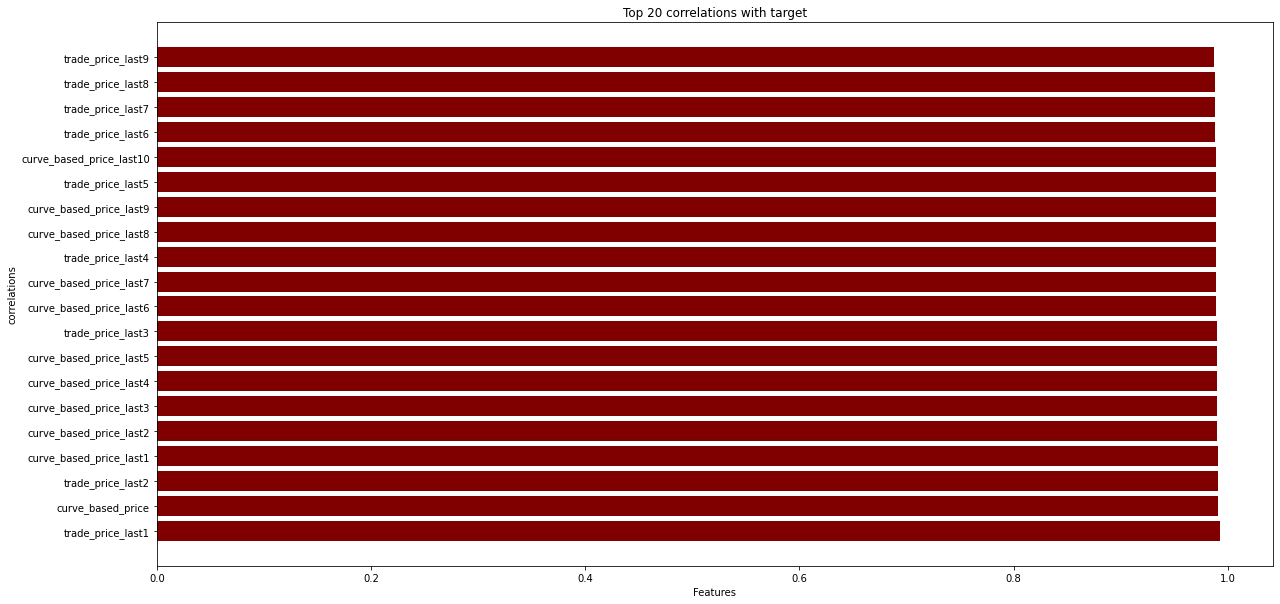

In [ ]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.barh(top20['feature'],top20['Corr'], color ='maroon')
 
plt.xlabel("Features")
plt.ylabel("correlations")
plt.title("Top 20 correlations with target")
plt.show()

In [ ]:
last15=correlations.tail(15).copy()

In [ ]:
bottom_list1=last15.feature.to_list()

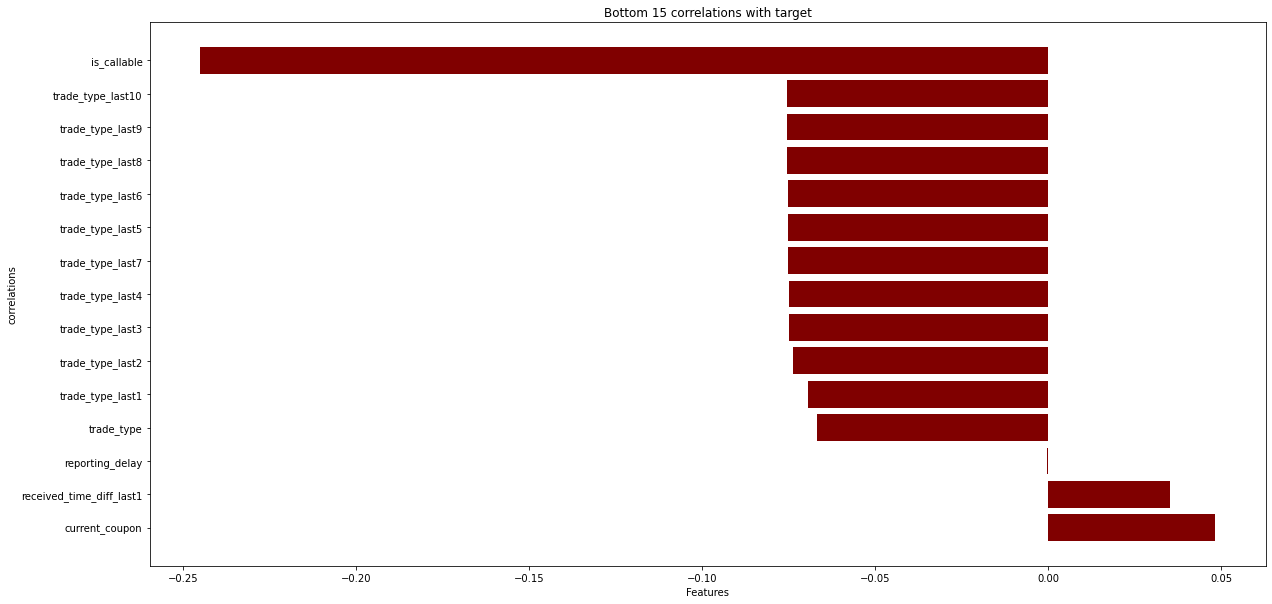

In [ ]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.barh(last15['feature'],last15['Corr'], color ='maroon')
 
plt.xlabel("Features")
plt.ylabel("correlations")
plt.title("Bottom 15 correlations with target")
plt.show()

In [ ]:
inputs_df.head()

,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,...,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,11.316404,5.95,26.031126,0,1.731,120000,2,127.561201,758762,129.089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.763446,5.95,26.016697,0,30.518,85000,4,126.323528,455028,128.596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.499730,5.95,26.008760,0,4.424,4200000,3,126.761433,250310,126.673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.865854,5.95,26.008619,0,43.059,5000001,2,127.025765,4441,126.880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.938543,5.95,25.981840,0,6.332,10000,2,125.736081,844484,126.362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Imputer

In [ ]:
numerical_cols=inputs_df.select_dtypes(include=np.number).columns.tolist()

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean');
imputer.fit(inputs_df[numerical_cols]);
inputs_df[numerical_cols]=imputer.transform(inputs_df[numerical_cols]);


In [ ]:
inputs_df.head()

,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,...,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,11.316404,5.95,26.031126,0.0,1.731,120000.0,2.0,127.561201,758762.0,129.089,...,260970.127952,103.359529,265035.845041,3.233956,103.138812,285453.903409,103.350815,264793.002748,3.234187,103.12988
1,8.763446,5.95,26.016697,0.0,30.518,85000.0,4.0,126.323528,455028.0,128.596,...,260970.127952,103.359529,265035.845041,3.233956,103.138812,285453.903409,103.350815,264793.002748,3.234187,103.12988
2,6.499730,5.95,26.008760,0.0,4.424,4200000.0,3.0,126.761433,250310.0,126.673,...,260970.127952,103.359529,265035.845041,3.233956,103.138812,285453.903409,103.350815,264793.002748,3.234187,103.12988
3,0.865854,5.95,26.008619,0.0,43.059,5000001.0,2.0,127.025765,4441.0,126.880,...,260970.127952,103.359529,265035.845041,3.233956,103.138812,285453.903409,103.350815,264793.002748,3.234187,103.12988
4,11.938543,5.95,25.981840,0.0,6.332,10000.0,2.0,125.736081,844484.0,126.362,...,260970.127952,103.359529,265035.845041,3.233956,103.138812,285453.903409,103.350815,264793.002748,3.234187,103.12988


In [ ]:
inputs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762678 entries, 0 to 762677
Data columns (total 58 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   weight                     762678 non-null  float64
 1   current_coupon             762678 non-null  float64
 2   time_to_maturity           762678 non-null  float64
 3   is_callable                762678 non-null  float64
 4   reporting_delay            762678 non-null  float64
 5   trade_size                 762678 non-null  float64
 6   trade_type                 762678 non-null  float64
 7   curve_based_price          762678 non-null  float64
 8   received_time_diff_last1   762678 non-null  float64
 9   trade_price_last1          762678 non-null  float64
 10  trade_size_last1           762678 non-null  float64
 11  trade_type_last1           762678 non-null  float64
 12  curve_based_price_last1    762678 non-null  float64
 13  received_time_diff_last2   76

##Scalar

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(inputs_df[numerical_cols]);
inputs_df[numerical_cols]=scaler.transform(inputs_df[numerical_cols])

In [ ]:
inputs_df

,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,...,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,0.263586,0.440741,0.308630,0.0,6.038494e-07,0.024,0.0,0.734858,0.069595,0.766308,...,0.022869,0.612368,0.053007,0.616978,0.569906,0.024850,0.612316,0.052958,0.617093,0.569856
1,0.204053,0.440741,0.308458,0.0,8.920676e-07,0.017,1.0,0.727629,0.041736,0.763359,...,0.022869,0.612368,0.053007,0.616978,0.569906,0.024850,0.612316,0.052958,0.617093,0.569856
2,0.151265,0.440741,0.308364,0.0,6.308120e-07,0.840,0.5,0.730187,0.022959,0.751853,...,0.022869,0.612368,0.053007,0.616978,0.569906,0.024850,0.612316,0.052958,0.617093,0.569856
3,0.019888,0.440741,0.308362,0.0,1.017629e-06,1.000,0.0,0.731731,0.000407,0.753092,...,0.022869,0.612368,0.053007,0.616978,0.569906,0.024850,0.612316,0.052958,0.617093,0.569856
4,0.278094,0.440741,0.308043,0.0,6.499151e-07,0.002,0.0,0.724198,0.077458,0.749993,...,0.022869,0.612368,0.053007,0.616978,0.569906,0.024850,0.612316,0.052958,0.617093,0.569856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762673,0.012625,0.425926,0.118026,0.0,6.101771e-07,0.010,0.5,0.582529,0.000167,0.599788,...,0.000308,0.600590,0.010000,1.000000,0.559384,0.000309,0.598604,0.100000,0.000000,0.559384
762674,0.005801,0.425926,0.118026,0.0,2.132336e-06,0.100,0.0,0.582569,0.000037,0.600249,...,0.000343,0.600590,0.010000,1.000000,0.559384,0.000342,0.600590,0.010000,1.000000,0.559384
762675,0.007192,0.425926,0.118026,0.0,1.076490e-06,0.740,1.0,0.582327,0.000056,0.600063,...,0.000396,0.600590,0.010000,0.500000,0.559384,0.000394,0.600590,0.010000,1.000000,0.559384
762676,0.007888,0.425926,0.118026,0.0,6.817435e-07,0.400,1.0,0.582228,0.000067,0.601260,...,0.000448,0.600213,0.036000,1.000000,0.559384,0.000457,0.600590,0.010000,0.500000,0.559384


In [ ]:
inputs_df[numerical_cols].describe().loc[['min', 'max']]

,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,...,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Split the Data for training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numerical_cols],Target,test_size=0.25,random_state=42)

In [ ]:
train_inputs.head()

,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,...,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
29080,0.001052,0.162963,0.009781,0.0,6.047806e-07,0.0030,0.5,0.584495,1.742715e-06,0.602888,...,0.021816,0.601613,0.0002,0.0,0.562377,0.021673,0.601613,0.0002,1.0,0.562377
174379,0.000374,0.555556,0.046698,0.0,6.522579e-07,0.0020,1.0,0.584931,3.668873e-07,0.632653,...,0.046198,0.627418,0.0328,1.0,0.557462,0.045895,0.627418,0.0328,0.0,0.557462
387800,0.010988,0.592593,0.068697,0.0,2.926485e-06,0.0014,0.0,0.626325,1.273099e-04,0.645217,...,0.006948,0.649106,0.2000,1.0,0.604969,0.006988,0.649480,0.2000,1.0,0.604783
493542,0.029329,0.555556,0.016004,0.0,9.390243e-07,0.2730,1.0,0.631047,8.774109e-04,0.650279,...,0.006623,0.649866,0.0050,0.0,0.607252,0.007582,0.647072,0.0100,0.0,0.607002
722975,0.127240,0.157407,0.028554,0.0,7.366799e-07,0.0020,0.0,0.572237,1.625714e-02,0.593793,...,0.059553,0.591962,0.0500,0.5,0.551912,0.060182,0.590646,0.2184,1.0,0.551814


In [ ]:
val_inputs.head()

,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,...,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
369154,0.000000,0.485185,0.308888,0.0,9.296630e-07,0.002,1.0,0.611327,0.000000e+00,0.634448,...,0.022869,0.612368,0.053007,0.616978,0.569906,0.024850,0.612316,0.052958,0.617093,0.569856
69012,0.000125,0.592593,0.027047,0.0,6.118291e-07,0.002,1.0,0.576504,9.172182e-08,0.604234,...,0.106832,0.599148,0.007000,0.500000,0.552181,0.106131,0.598550,0.007000,1.000000,0.552181
565061,0.070152,0.277778,0.043874,0.0,2.383162e-05,0.014,0.5,0.567482,4.960866e-03,0.598251,...,0.005815,0.596635,0.002000,0.500000,0.545345,0.005778,0.591256,0.002000,1.000000,0.545345
329245,0.007379,0.453704,0.065602,0.0,6.425962e-07,0.005,0.5,0.622764,5.888541e-05,0.634023,...,0.000338,0.645313,0.004000,1.000000,0.599494,0.000336,0.651296,0.004000,0.500000,0.599494
134977,0.075285,0.370370,0.021353,0.0,8.159159e-04,0.001,1.0,0.573552,5.710050e-03,0.599010,...,0.007134,0.590772,0.001000,1.000000,0.551640,0.036122,0.589226,0.006000,0.000000,0.553150


In [ ]:
train_targets

29080     101.7751
174379    106.7500
387800    109.0100
493542    109.9680
722975     99.8390
            ...   
259178    115.8890
365838    103.1000
131932    108.3400
671155     84.5000
121958    100.0320
Name: trade_price, Length: 572008, dtype: float64

In [ ]:
val_targets

369154    109.446000
69012     101.500000
565061    100.364300
329245    108.433000
134977     99.750000
             ...    
22081     105.716000
472734    107.844000
91729     101.000000
159916    123.384077
244262     88.250000
Name: trade_price, Length: 190670, dtype: float64

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dhanasekar1620/bond-prediction


'https://jovian.ai/dhanasekar1620/bond-prediction'

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
# Fit the model using inputs and targets
model.fit(train_inputs,train_targets)

LinearRegression()

### Testing the Model

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_preds = model.predict(train_inputs)

In [ ]:
train_rmse = mean_squared_error(train_targets,train_preds,squared=False)
print('The RMSE loss for the training set is $ {}.'.format(train_rmse))

The RMSE loss for the training set is $ 1.0260159272299918.


In [ ]:
val_preds = model.predict(val_inputs)
val_rmse = mean_squared_error(val_targets,val_preds,squared=False)
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse))

The RMSE loss for the validation set is $ 1.0040122996643555.


####Feature Importance

In [ ]:
# w
model.coef_

array([ 6.73207954e-02,  3.43424701e-02,  1.74103179e-01,  3.72956228e-03,
       -1.43737904e+00, -2.80561719e-01,  1.89698049e-01,  7.48165093e+01,
       -2.40574251e+00,  6.80518850e+01,  1.31327056e-01,  8.01696091e-02,
        1.41546796e+01, -1.81827570e-01,  1.67630052e+01, -1.27628612e-02,
       -4.31115285e-02, -1.21243992e+01, -4.76390500e-01,  1.12062127e+01,
        1.15107546e-02, -3.88952342e-02, -9.64158669e+00,  1.16785111e-01,
        9.02786905e+00,  7.52373249e-03, -1.88955024e-02, -8.02793456e+00,
       -1.05527124e-01,  6.48212747e+00,  4.61198682e-03, -1.76620303e-02,
       -5.66610799e+00,  9.99424069e-02,  6.06515055e+00,  5.20770988e-03,
       -1.38637901e-02, -6.49688669e+00,  1.51320174e-01,  5.31118753e+00,
        1.21808487e-02, -1.04454996e-03, -3.45245892e+00,  9.43808340e-02,
        3.93322304e+00,  1.09705280e-03, -4.51541892e-03, -4.45879107e+00,
        3.80343303e-02,  6.14721796e+00,  1.42260716e-02, -1.37859239e-02,
       -6.37295223e+00,  

In [ ]:
weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': model.coef_
}).sort_values('weight', ascending=False)

In [ ]:
weights_df.head()

,columns,weight
7,curve_based_price,74.816509
9,trade_price_last1,68.051885
14,trade_price_last2,16.763005
12,curve_based_price_last1,14.154680
19,trade_price_last3,11.206213


In [ ]:
# b
model.intercept_

1.3743361265446339

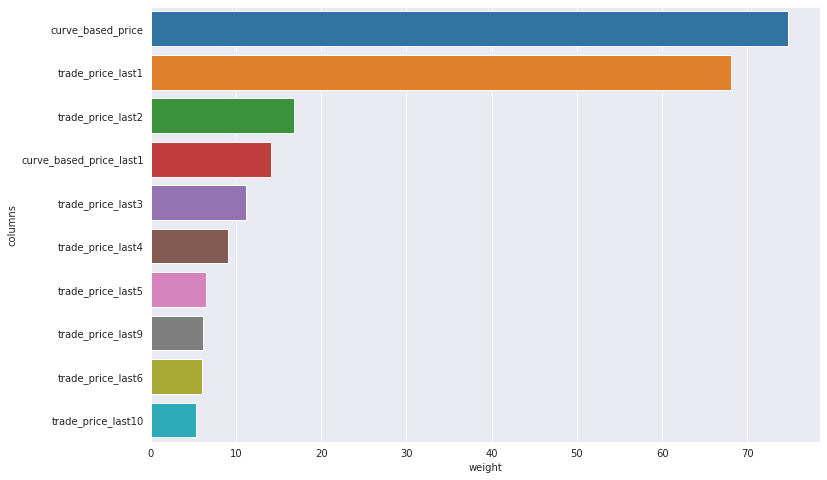

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
sns.barplot(data=weights_df.head(10),y='columns',x='weight')

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dhanasekar1620/bond-prediction


'https://jovian.ai/dhanasekar1620/bond-prediction'

##SGDRegressor

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
model1 = SGDRegressor()
# Fit the model using inputs and targets
model1.fit(train_inputs,train_targets)

SGDRegressor()

In [ ]:
train_preds1 = model1.predict(train_inputs)

In [ ]:
train_rmse1 = mean_squared_error(train_targets,train_preds1,squared=False)
print('The RMSE loss for the training set is $ {}.'.format(train_rmse1))

The RMSE loss for the training set is $ 1.1433167897248206.


In [ ]:
val_preds1 = model1.predict(val_inputs)
val_rmse1 = mean_squared_error(val_targets,val_preds1,squared=False)
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse1))

The RMSE loss for the validation set is $ 1.126417761614484.


In [ ]:
model1.coef_
weights_df1 = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': model1.coef_
}).sort_values('weight', ascending=False)

In [ ]:
weights_df1.head()

,columns,weight
9,trade_price_last1,33.053786
7,curve_based_price,22.279009
12,curve_based_price_last1,21.286257
14,trade_price_last2,20.699276
19,trade_price_last3,14.040728


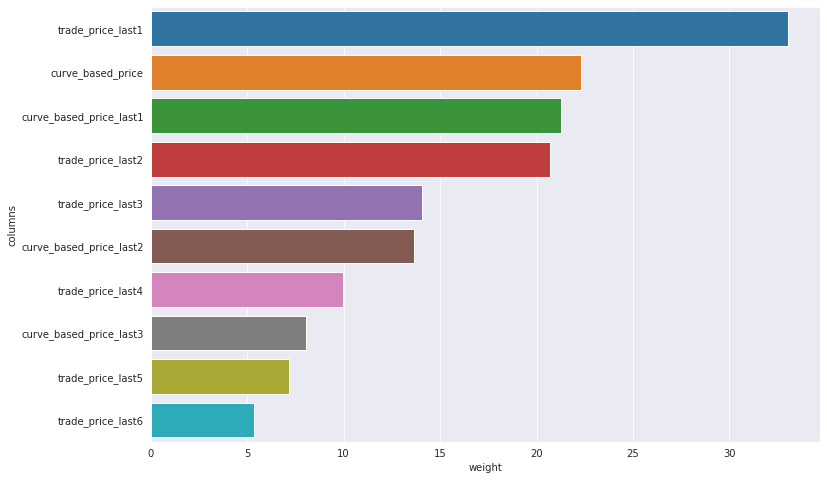

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
sns.barplot(data=weights_df1.head(10),y='columns',x='weight')

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dhanasekar1620/bond-prediction


'https://jovian.ai/dhanasekar1620/bond-prediction'

##RidgeRegression

In [ ]:
from sklearn.linear_model import Ridge
model2=Ridge()
# Fit the model using inputs and targets
model2.fit(train_inputs,train_targets)

Ridge()

In [ ]:
train_preds2 = model2.predict(train_inputs)
train_rmse2 = mean_squared_error(train_targets,train_preds2,squared=False)
print('The RMSE loss for the training set is $ {}.'.format(train_rmse2))

The RMSE loss for the training set is $ 1.026588016663869.


In [ ]:
val_preds2 = model2.predict(val_inputs)
val_rmse2 = mean_squared_error(val_targets,val_preds2,squared=False)
print('The RMSE loss for the validation set is $ {}.'.format(val_rmse2))

The RMSE loss for the validation set is $ 1.005131731998341.


In [ ]:
model2.coef_
weights_df2 = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': model2.coef_
}).sort_values('weight', ascending=False)

In [ ]:
weights_df2.head()

,columns,weight
9,trade_price_last1,67.086387
7,curve_based_price,59.346963
12,curve_based_price_last1,26.812938
14,trade_price_last2,16.917495
19,trade_price_last3,11.229540


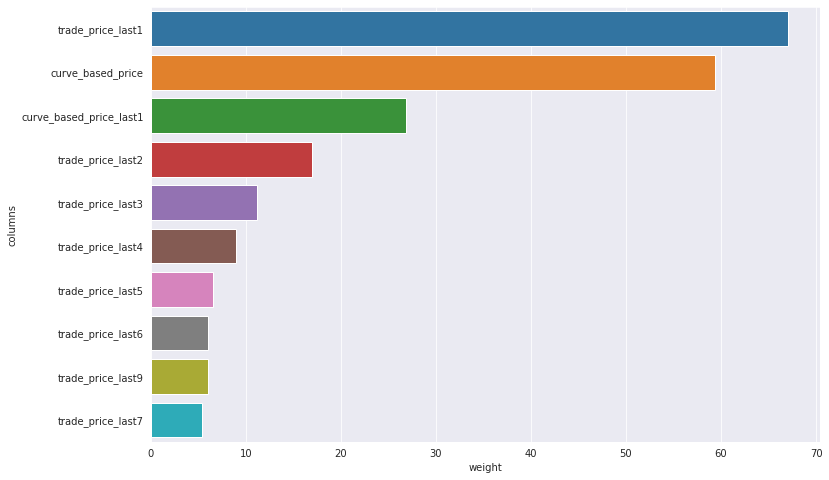

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
sns.barplot(data=weights_df2.head(10),y='columns',x='weight')

##Visualization of Linear, SGD and Ridge Regressors

###Top 10 Features Comparison

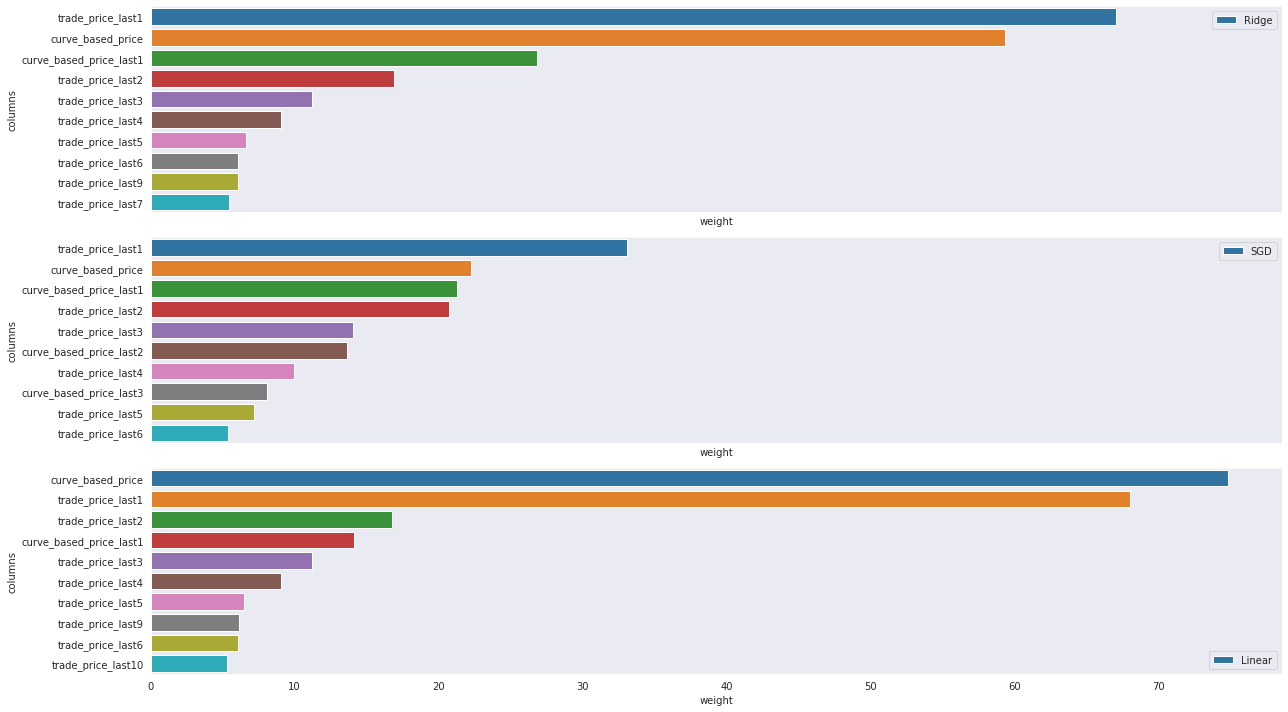

In [ ]:
fig, axes=plt.subplots(3,figsize=(18, 10),sharex=True)
sns.barplot(ax=axes[0],data=weights_df2.head(10), x='weight', y='columns',label="Ridge");
sns.barplot(ax=axes[1],data=weights_df1.head(10), x='weight', y='columns',label="SGD");
sns.barplot(ax=axes[2],data=weights_df.head(10), x='weight', y='columns',label="Linear");

axes[0].legend()
axes[0].grid(False)
axes[1].legend()
axes[1].grid(False)
axes[2].legend()
axes[2].grid(False)
fig.tight_layout()
plt.show()

###Bottom 10 Features Comparison

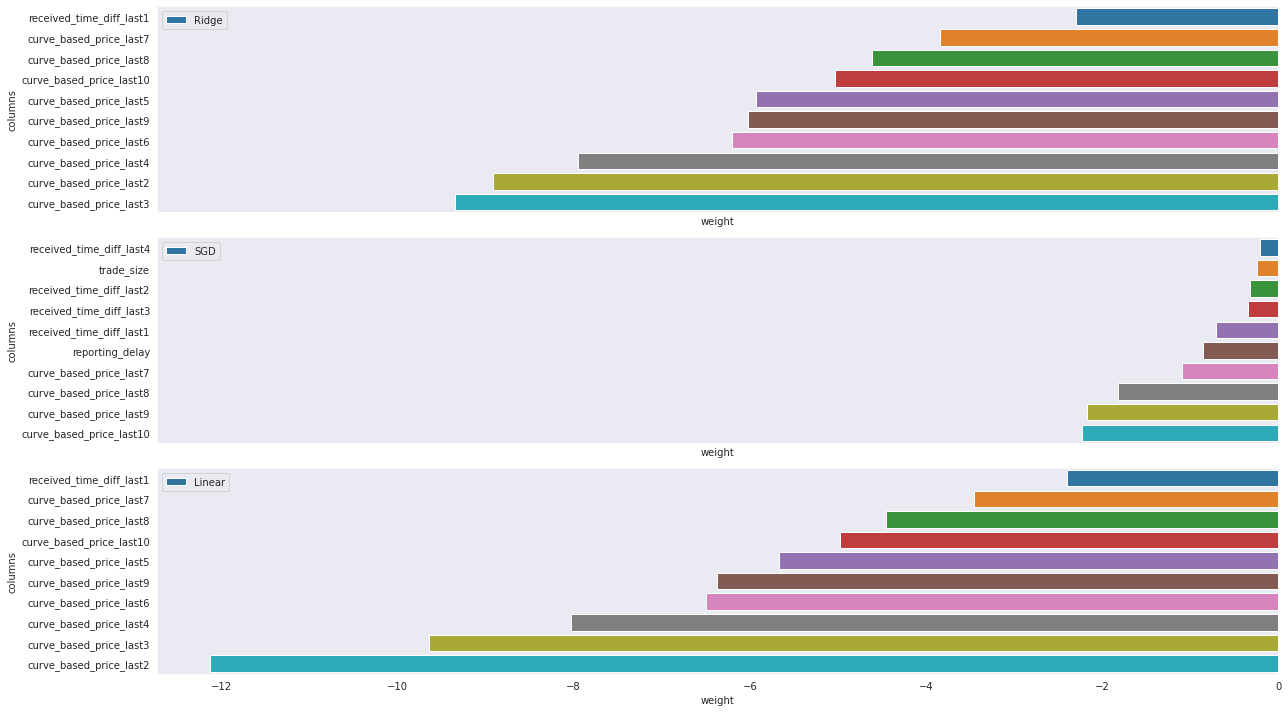

In [ ]:
fig, axes=plt.subplots(3,figsize=(18, 10),sharex=True)
sns.barplot(ax=axes[0],data=weights_df2.tail(10), x='weight', y='columns',label="Ridge");
sns.barplot(ax=axes[1],data=weights_df1.tail(10), x='weight', y='columns',label="SGD");
sns.barplot(ax=axes[2],data=weights_df.tail(10), x='weight', y='columns',label="Linear");


axes[0].legend()
axes[0].grid(False)
axes[1].legend()
axes[1].grid(False)
axes[2].legend()
axes[2].grid(False)
fig.tight_layout()
plt.show()

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dhanasekar1620/bond-prediction


'https://jovian.ai/dhanasekar1620/bond-prediction'

##Using the test data provided

In [ ]:
test_df=pd.read_csv('benchmark-bond-trade-price-challenge/test.csv')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61146 entries, 0 to 61145
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         61146 non-null  int64  
 1   weight                     61146 non-null  float64
 2   current_coupon             61146 non-null  float64
 3   time_to_maturity           61146 non-null  float64
 4   is_callable                61146 non-null  int64  
 5   reporting_delay            61146 non-null  float64
 6   trade_size                 61146 non-null  int64  
 7   trade_type                 61146 non-null  int64  
 8   curve_based_price          61146 non-null  float64
 9   received_time_diff_last1   61146 non-null  int64  
 10  trade_price_last1          61146 non-null  float64
 11  trade_size_last1           61146 non-null  int64  
 12  trade_type_last1           61146 non-null  int64  
 13  curve_based_price_last1    61142 non-null  flo

In [ ]:
evaluate=test_df[input_cols].copy()

In [ ]:
imputer.fit(evaluate[numerical_cols]);
evaluate[numerical_cols]=imputer.transform(evaluate[numerical_cols]);

In [ ]:
scaler.fit(evaluate[numerical_cols]);
evaluate[numerical_cols]=scaler.transform(evaluate[numerical_cols])

In [ ]:
#Linear Regression
evaluate_preds = model.predict(evaluate)

In [ ]:
#SGD Regression
evaluate_preds1 = model1.predict(evaluate)

In [ ]:
#Ridge Regression
evaluate_preds2 = model2.predict(evaluate)

##Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create the model
tree = DecisionTreeRegressor(random_state=42)

In [ ]:
# Fit the model to the training data
tree.fit(train_inputs,train_targets)

DecisionTreeRegressor(random_state=42)

In [ ]:
tree_train_preds = tree.predict(train_inputs)
tree_train_preds

array([101.7751, 106.75  , 109.01  , ..., 108.34  ,  84.5   , 100.032 ])

In [ ]:
tree_train_rmse = mean_squared_error(tree_train_preds,train_targets,squared=False)

In [ ]:
tree_val_preds = tree.predict(val_inputs)

In [ ]:
tree_val_rmse = mean_squared_error(tree_val_preds,val_targets,squared=False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 6.861540082373082e-09, Validation RMSE: 1.1637331593963993


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dhanasekar1620/bond-prediction


'https://jovian.ai/dhanasekar1620/bond-prediction'

In [ ]:
from sklearn.tree import plot_tree, export_text
sns.set_style('darkgrid')
%matplotlib inline

[Text(0.5, 0.8333333333333334, 'trade_price_last1 <= 0.636\nsquared_error = 96.559\nsamples = 572008\nvalue = 103.453'),
 Text(0.25, 0.5, 'trade_price_last1 <= 0.475\nsquared_error = 53.502\nsamples = 433121\nvalue = 99.765'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'trade_price_last1 <= 0.706\nsquared_error = 56.144\nsamples = 138887\nvalue = 114.954'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

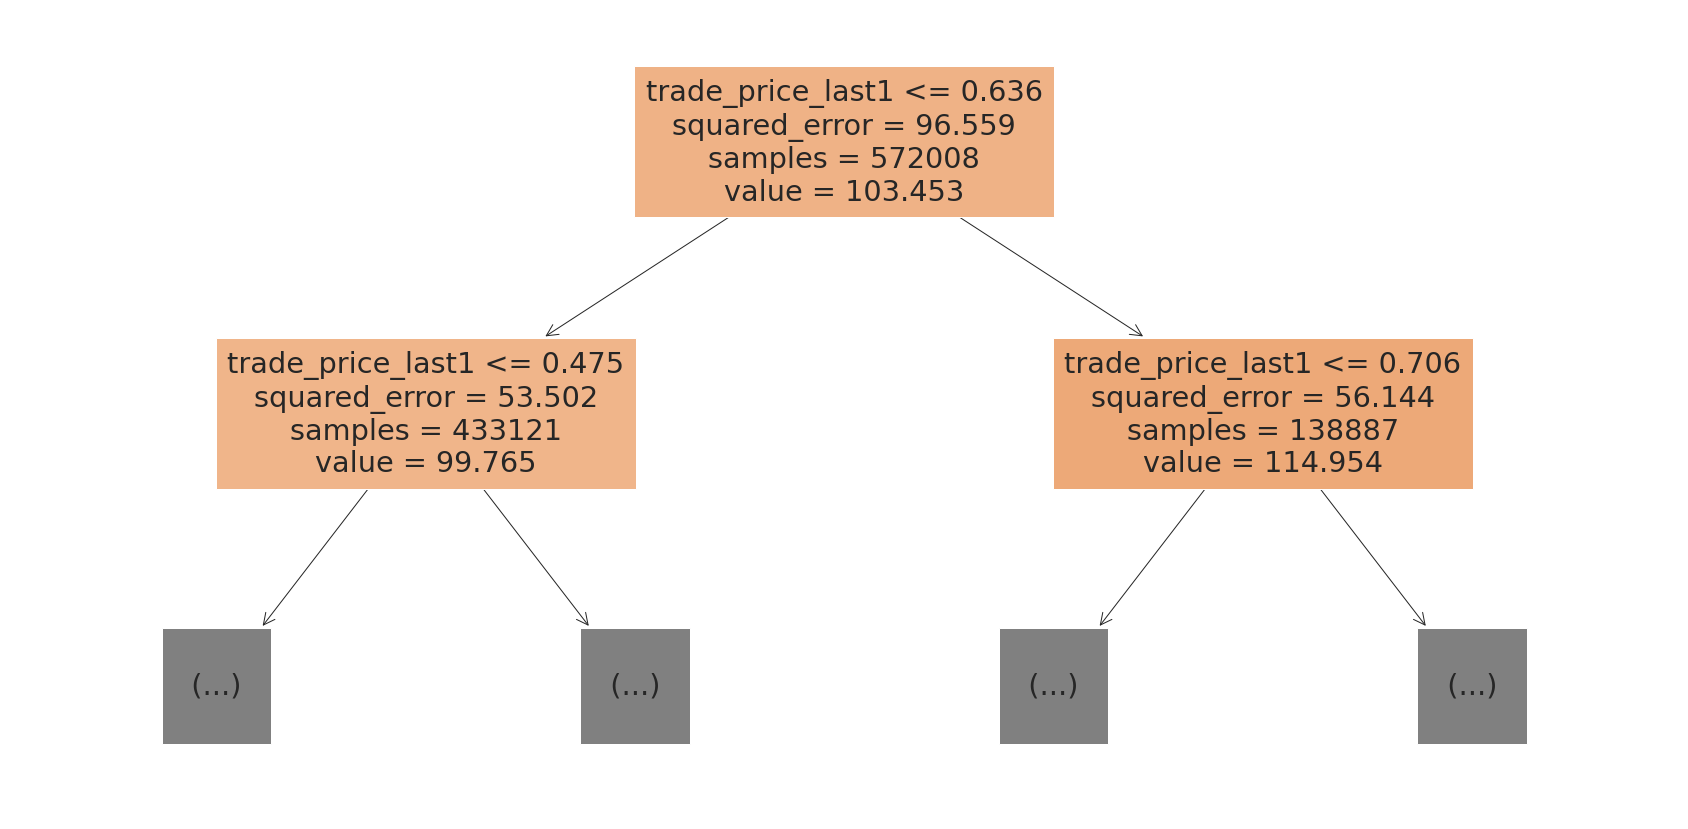

In [ ]:
plt.figure(figsize=(30,15))
# Visualize the tree graphically using plot_tree
plot_tree(tree,feature_names=train_inputs.columns, max_depth=1, filled=True)

In [ ]:
# Visualize the tree textually using export_text
tree_text =export_text(tree, max_depth=10, feature_names=list(train_inputs.columns))

In [ ]:
# Display the first few lines
print(tree_text[:500])

|--- trade_price_last1 <= 0.64
|   |--- trade_price_last1 <= 0.48
|   |   |--- curve_based_price <= 0.28
|   |   |   |--- trade_price_last1 <= 0.15
|   |   |   |   |--- curve_based_price_last8 <= 0.09
|   |   |   |   |   |--- trade_price_last1 <= 0.03
|   |   |   |   |   |   |--- curve_based_price_last4 <= 0.03
|   |   |   |   |   |   |   |--- trade_price_last1 <= 0.01
|   |   |   |   |   |   |   |   |--- trade_price_last1 <= 0.00
|   |   |   |   |   |   |   |   |   |--- trade_size_last9 <= 0.04


In [ ]:
# Check feature importance
tree_importances = tree.feature_importances_

In [ ]:
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

In [ ]:
tree_importance_df.head()

,feature,importance
9,trade_price_last1,0.916142
7,curve_based_price,0.070769
6,trade_type,0.002074
14,trade_price_last2,0.001549
47,curve_based_price_last8,0.000683


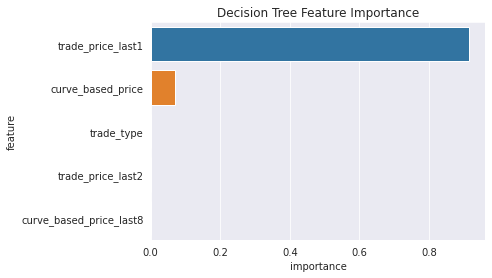

In [ ]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(), x='importance', y='feature');

##RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create the model
rf1 = RandomForestRegressor(n_jobs=-1, random_state=42,n_estimators=30, max_depth=3)

In [ ]:
# Fit the model
rf1.fit(train_inputs,train_targets)

RandomForestRegressor(max_depth=3, n_estimators=30, n_jobs=-1, random_state=42)

In [ ]:
rf1_train_preds = rf1.predict(train_inputs)

rf1_train_rmse = mean_squared_error(rf1_train_preds,train_targets,squared=False)

In [ ]:
rf1_val_preds = rf1.predict(val_inputs)

rf1_val_rmse = mean_squared_error(rf1_val_preds,val_targets,squared=False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: 2.893148154074947, Validation RMSE: 2.8956124905504366


## Random Forest Hyperparameter Tuning and Regularization

####n_estimators,max_depth, max_leaf_nodes

In [ ]:
def RFtest_params(**params):
    Random_Forest_model = RandomForestRegressor(n_jobs=-1, random_state=42, **params)
    Random_Forest_model.fit(train_inputs, train_targets)
    RFtrain_rmse = mean_squared_error(Random_Forest_model.predict(train_inputs), train_targets)
    RFval_rmse = mean_squared_error(Random_Forest_model.predict(val_inputs), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(RFtrain_rmse, RFval_rmse))

In [ ]:
RFtest_params(max_depth=4,n_estimators=50,max_leaf_nodes=2**5)

Train RMSE: 3.178884338665874, Validation RMSE: 3.1433963022637776


In [ ]:
RFtest_params(max_depth=5,n_estimators=60,max_leaf_nodes=2**10)

Train RMSE: 1.652807713289686, Validation RMSE: 1.6045250924056265


In [ ]:
RFtest_params(max_depth=5,n_estimators=80,max_leaf_nodes=2**10)

Train RMSE: 1.651357519540944, Validation RMSE: 1.6025561970265925


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dhanasekar1620/bond-prediction


'https://jovian.ai/dhanasekar1620/bond-prediction'

##XGBRegressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
XGBmodel = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [ ]:
# Fit the model
XGBmodel.fit(train_inputs,train_targets)

[14:06:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

In [ ]:
preds = XGBmodel.predict(train_inputs)

In [ ]:
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [ ]:
rmse(preds, train_targets)

12.624322649948803

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': XGBmodel.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
9,trade_price_last1,0.358125
12,curve_based_price_last1,0.254275
7,curve_based_price,0.213769
14,trade_price_last2,0.081057
19,trade_price_last3,0.020600
24,trade_price_last4,0.015770
17,curve_based_price_last2,0.013024
34,trade_price_last6,0.011476
47,curve_based_price_last8,0.011368
29,trade_price_last5,0.007514


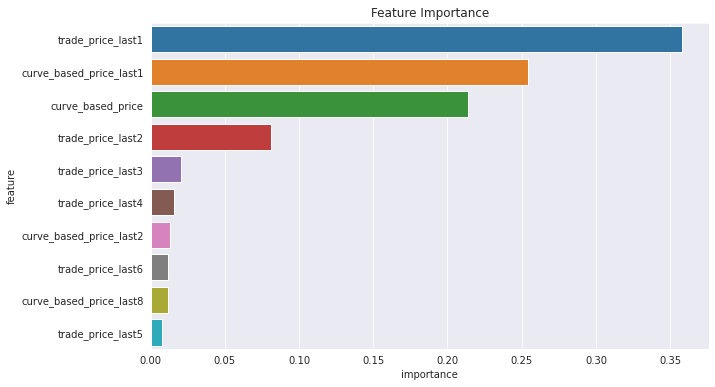

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

###XGB Hyperparameter Tuning and Regularization

In [ ]:
def test_params(**params):
    XGBRegressor_model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    XGBRegressor_model.fit(train_inputs, train_targets)
    train_rmse = rmse(XGBRegressor_model.predict(train_inputs), train_targets)
    val_rmse = rmse(XGBRegressor_model.predict(val_inputs), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

####Hyperparameter n_estimators

In [ ]:
test_params(n_estimators=40)

[14:07:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1.8425567034819768, Validation RMSE: 1.8347363094385565


In [ ]:
test_params(n_estimators=50)

[14:08:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 1.113890074798538, Validation RMSE: 1.1020523448899162


In [ ]:
test_params(n_estimators=60)

[14:09:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.9671258341352644, Validation RMSE: 0.9545623143554444


In [ ]:
test_params(n_estimators=70)

[14:11:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.9344956878061881, Validation RMSE: 0.9229751677121765


####Hyperparameter maxdepth

In [ ]:
test_params(max_depth=2)

[14:14:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.9813577503667666, Validation RMSE: 0.9694539493951796


In [ ]:
test_params(max_depth=5)

[14:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.8272102064004637, Validation RMSE: 0.8372527479972082


In [ ]:
test_params(max_depth=10)

[14:20:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.6310786222036282, Validation RMSE: 0.7786921582109955


####Hyperparameter learning rate

In [ ]:
test_params(learning_rate=0.01)

[14:29:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 37.901555721173885, Validation RMSE: 37.88312834709381


In [ ]:
test_params(learning_rate=0.1)

[14:32:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.9077257901581114, Validation RMSE: 0.8988870989533401


In [ ]:
test_params(learning_rate=0.2)

[14:34:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.9154265444646993, Validation RMSE: 0.9161985883850818


##Putting the parameters in the training *model*

In [ ]:
XGBRegressor_model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=60,learning_rate=0.1, max_depth=10)

In [ ]:
XGBRegressor_model.fit(train_inputs,train_targets)

[14:36:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=10, n_estimators=60, n_jobs=-1, random_state=42)

In [ ]:
XGB_train_preds = XGBRegressor_model.predict(train_inputs)

In [ ]:
XGB_train_rmse = mean_squared_error(XGB_train_preds,train_targets,squared=False)

print('XGB_train_rmse : ',XGB_train_rmse)

XGB_train_rmse :  0.7233299356698063


###Using the model with validation data

In [ ]:
XGB_val_preds = XGBRegressor_model.predict(val_inputs)

In [ ]:
XGB_val_rmse = mean_squared_error(XGB_val_preds,val_targets,squared=False)

print('XGB_val_rmse : ',XGB_val_rmse)

XGB_val_rmse :  0.8191189659253895


###Using the model with test data

In [ ]:
XGB_test_preds = XGBRegressor_model.predict(evaluate)

In [ ]:
print(XGB_test_preds)

[ 84.29819  110.79086   93.17857  ... 116.396706  67.1268    83.05664 ]


##Saving the model

In [ ]:
import joblib

In [ ]:
bond_prices_prediction = {
    'model': XGBRegressor_model,
    'imputer': imputer,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_col': Target,
    'numeric_cols': numerical_cols
}

In [ ]:
joblib.dump(bond_prices_prediction, 'bond_prices_prediction.joblib')

['bond_prices_prediction.joblib']

In [ ]:
jovian.commit(outputs=['bond_prices_prediction.joblib'])

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
Committed successfully! https://jovian.ai/dhanasekar1620/bond-prediction


'https://jovian.ai/dhanasekar1620/bond-prediction'

##Creating a Dataframe for submission

In [ ]:
sub_series=test_df['id'].copy()

In [ ]:
sub_df = sub_series.to_frame()

In [ ]:
sub_df['Predicted_price']=XGB_test_preds

In [ ]:
sub_df

,id,Predicted_price
0,762679,84.298187
1,762680,110.790863
2,762681,93.178574
3,762682,96.282051
4,762683,89.936119
...,...,...
61141,823820,72.880821
61142,823821,88.023499
61143,823822,116.396706
61144,823823,67.126801


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/dhanasekar1620/bond-prediction


'https://jovian.ai/dhanasekar1620/bond-prediction'

In [ ]:
sub_df.to_csv('sub.csv', index=False)

In [ ]:
from IPython.display import FileLink
FileLink('sub.csv') # Doesn't work on Colab, use the file browser instead to download the file.

/content/sub.csv

##Summary

- The input dataset was correlated with the target and the important features were identified and plotted.

- The dataset had missing/Nan values which were imputed and Scaled.

- The dataset is then split into training and validation sets.

- The ML models were trained using the training datasets.

- Hyperparameter tuning was done on the models to achieve best model.

- Based on the output rmse values the most suitable model was selected considering the system capability.

- The model was finally run with the test dataset and predictions were obtained.

- The predictions were recorded in a dataframe and submitted in CSV format.


##References

Stack Overflow - https://stackoverflow.com/

Geeksforgeeks -https://www.geeksforgeeks.org/   selecting-rows-in-pandas-dataframe-based-on-conditions/

AnalyticsVidhya - https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

XGBoost - https://xgboost.readthedocs.io/en/stable/parameter.html

Hyperparameter Tuning - https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

##Submission

In [ ]:
jovian.submit(assignment="zerotogbms-project")